<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Load the Life expectancy dataset and display the first five records 

In [3]:
df = pd.read_csv('Life_Expectancy.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,nan,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,nan,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,nan,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


#### Check the shape of the data and display its information

In [7]:
df.shape

(182, 20)

In [8]:
count = df.isna().sum()
percent = df.isna().sum()/len(df)*100
missing_values = pd.concat([count,percent],axis=1,keys=['counts','percent'])
missing_values.sort_values(by='percent',ascending=False)

,counts,percent
Alcohol,167,91.758242
Population,41,22.527473
GDP,25,13.736264
Income_Index,13,7.142857
Life_Expectancy,9,4.945055
Schooling,9,4.945055
Adult_Mortality,9,4.945055
Hepatitis B,9,4.945055
Malnourished5_9,4,2.197802
BMI,4,2.197802


In [9]:
df.Life_Expectancy.isna().sum()

9

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,nan,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,nan,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,nan,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


In [11]:
missing_values.sort_values(by='percent',ascending=False)

,counts,percent
Alcohol,167,91.758242
Population,41,22.527473
GDP,25,13.736264
Income_Index,13,7.142857
Life_Expectancy,9,4.945055
Schooling,9,4.945055
Adult_Mortality,9,4.945055
Hepatitis B,9,4.945055
Malnourished5_9,4,2.197802
BMI,4,2.197802


In [12]:
n = df['Life_Expectancy'].isna().sum()
n

9

In [13]:
n=df.Life_Expectancy.isnull()
df=df.drop(df.index[[n.index[n==True].tolist()]])

In [14]:
df.shape

(173, 20)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
count = df.isna().sum()
percent = df.isna().sum()/len(df)*100
missing_values = pd.concat([count,percent],axis=1,keys=['counts','percent'])
missing_values.sort_values(by='percent',ascending=False)

,counts,percent
Alcohol,166,95.953757
Population,34,19.653179
GDP,21,12.138728
Hepatitis B,9,5.202312
Schooling,7,4.046243
Income_Index,7,4.046243
Malnourished5_9,2,1.156069
Malnourished10_19,2,1.156069
BMI,2,1.156069
Country,0,0.000000


In [16]:
df = df.drop('Alcohol',axis=1)
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


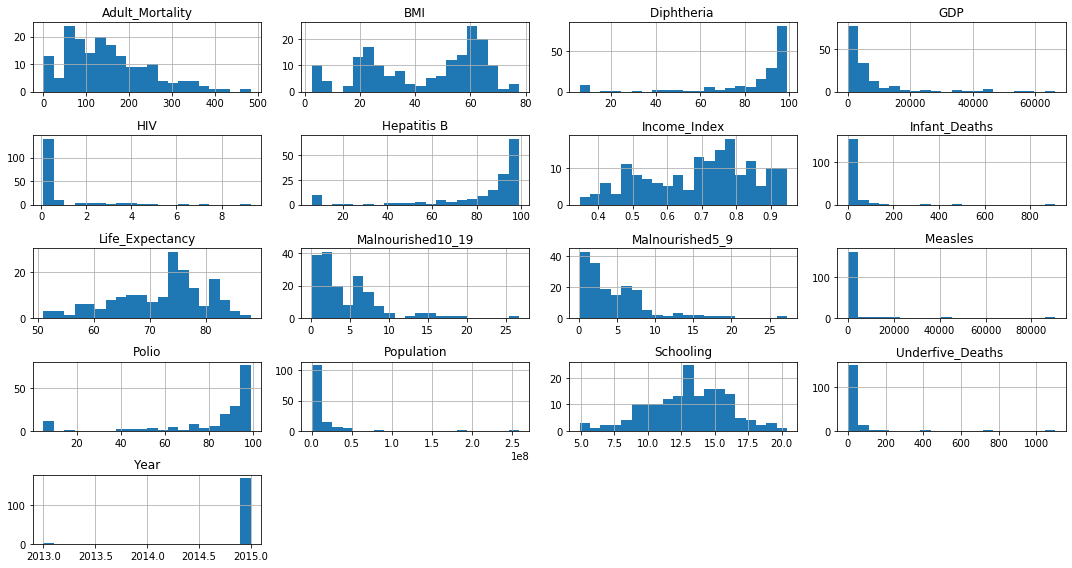

In [17]:
df.hist(bins=20,figsize=(15,8))
plt.tight_layout()

In [18]:
skew = pd.DataFrame(df.skew(),columns=['skewness'])
missing_values = pd.concat([missing_values,skew],axis=1)
missing_values

,counts,percent,skewness
Adult_Mortality,0,0.000000,0.840104
Alcohol,166,95.953757,nan
BMI,2,1.156069,-0.390623
Country,0,0.000000,nan
Diphtheria,0,0.000000,-2.303346
GDP,21,12.138728,2.845593
HIV,0,0.000000,3.442844
Hepatitis B,9,5.202312,-2.010876
Income_Index,7,4.046243,-0.380657
Infant_Deaths,0,0.000000,8.212565


In [19]:
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Malnourished10_19'] = df['Malnourished10_19'].fillna(df['Malnourished10_19'].median())
df['Malnourished5_9'] = df['Malnourished5_9'].fillna(df['Malnourished5_9'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())


df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Income_Index'] = df['Income_Index'].fillna(df['Income_Index'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())


In [20]:
count = df.isna().sum()
percent = df.isna().sum()/len(df)*100
missing_values = pd.concat([count,percent],axis=1,keys=['counts','percent'])
missing_values.sort_values(by='percent',ascending=False)

,counts,percent
Country,0,0.000000
Diphtheria,0,0.000000
Schooling,0,0.000000
Income_Index,0,0.000000
Malnourished5_9,0,0.000000
Malnourished10_19,0,0.000000
Population,0,0.000000
GDP,0,0.000000
HIV,0,0.000000
Polio,0,0.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
#as year has no variance we are dropping year
df = df.drop('Year',axis=1)
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,Developing,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,Developing,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,Developing,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,Developing,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,Developing,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df['Status_encode'] = pd.get_dummies(df['Status'],drop_first=True)
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,Developing,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,Developing,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,Developing,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,Developing,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,Developing,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [23]:
df = df.drop('Status',axis=1)
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
X = df.drop(['Country','Life_Expectancy'],axis=1)
y = df.Life_Expectancy
X =sm.add_constant(X)
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [25]:
model = sm.OLS(Y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     65.29
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.31e-51
Time:                        02:11:10   Log-Likelihood:                -327.37
No. Observations:                 138   AIC:                             688.7
Df Residuals:                     121   BIC:                             738.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                53.6933      2.70

In [26]:
from scipy.stats import levene
from scipy.stats import shapiro

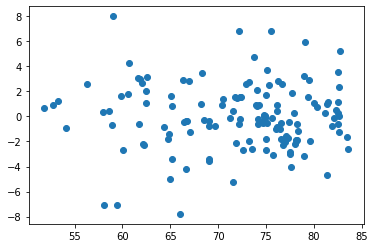

In [27]:
rs = model.resid
ypred =model.fittedvalues
plt.scatter(x=ypred,y=rs)
plt.show()

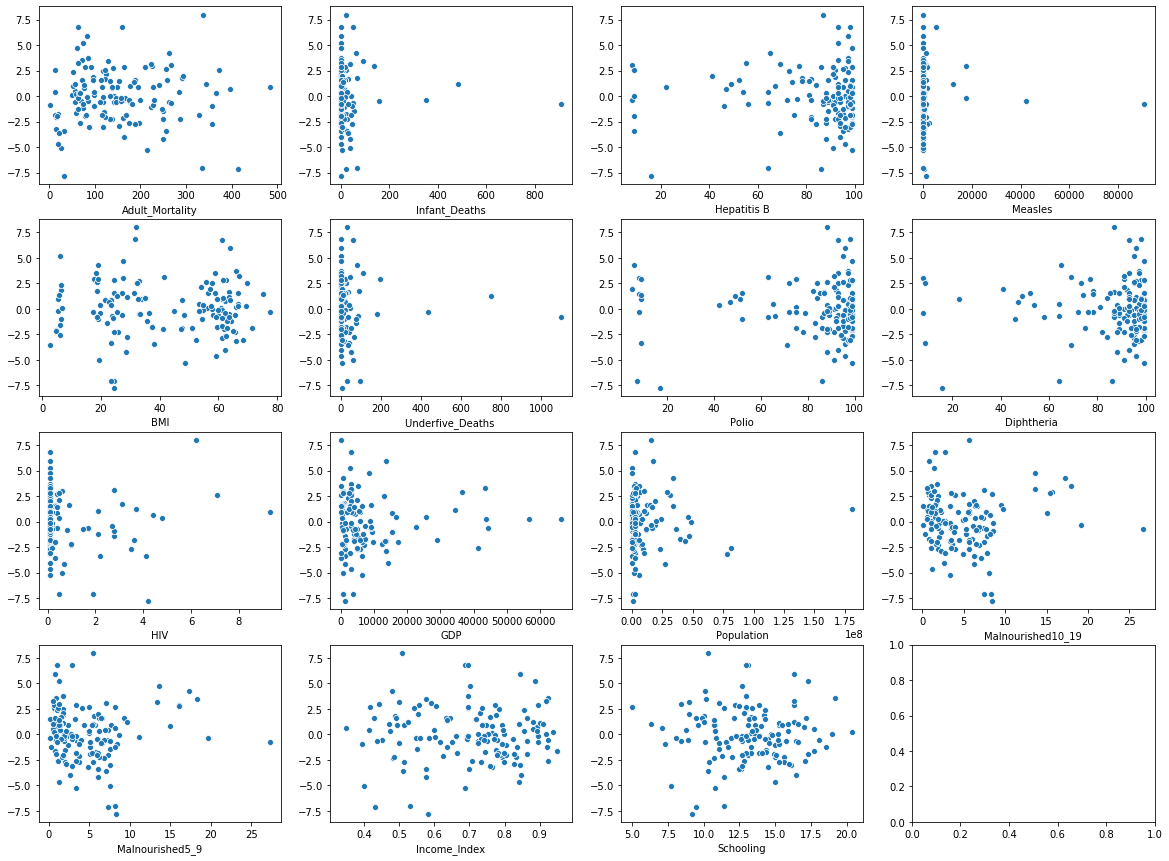

In [28]:
fig, ax = plt.subplots(nrows = 4, ncols= 4, figsize=(20, 15))
for variable, subplot in zip(X_train.columns[1:-1], ax.flatten()):
    sns.scatterplot(X_train[variable], model.resid , ax=subplot)

In [111]:
test = sms.het_breuschpagan(model.resid, model.model.exog)

# the test retuns 4 outputs, the last value is the p-value of the f-statistic
# print the p-value
print('p-value:', test[3])

# print the decision
if test[3] < 0.05:
    print('Heteroskedasticity is present in the data.')
else: 
    print('Homoskedasticity is present in the data.')

p-value: 0.8296218955285012
Homoskedasticity is present in the data.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [117]:
X = df[['Hepatitis B','Polio','Diphtheria ']]
y = df.Life_Expectancy
X =sm.add_constant(X)
lr = LinearRegression()
mod_imm = sm.OLS(y,X).fit()
print(mod_imm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     29.63
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.92e-15
Time:                        11:31:30   Log-Likelihood:                -568.86
No. Observations:                 173   AIC:                             1146.
Df Residuals:                     169   BIC:                             1158.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.9668      2.018     26.742      

In [119]:
res = mod_imm.resid

In [120]:
ypred = mod_imm.predict(X)

In [122]:
SSE = np.sum((y-ypred)**2)
SSE

7272.464916334297

In [123]:
SST = np.sum((y-np.mean(y))**2)
SST

11097.360231213872

In [126]:
SSE/SST*100

65.53328687915186

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
X = df[['Malnourished10_19','Malnourished5_9']]
y=df.Life_Expectancy
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
slr=sm.OLS(y_train,X_train).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     19.66
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           3.20e-08
Time:                        02:45:14   Log-Likelihood:                -466.03
No. Observations:                 138   AIC:                             938.1
Df Residuals:                     135   BIC:                             946.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.3070      0.91

In [165]:
# Both co-eff will decrease , hence when mal nutrion increse by one unit there is decrease in Life expectancy

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [225]:
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [249]:
ss = StandardScaler()
X = ss.fit_transform(df[['Adult_Mortality']])
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

In [250]:
model_lr = lr.fit(X_train,y_train)
print('the r2 value of linear regression ', model_lr.score(X_train,y_train))

the r2 value of linear regression  0.6415081556507949


In [256]:
ypred_train_lr = model_lr.predict(X_train)
ypred_test = model_lr.predict(X_test)
mse_train = mean_squared_error(ypred_train,y_train)
mse_test = mean_squared_error(ypred_test,y_test)

In [252]:
print('rmse of training with linear regression',np.sqrt(mse_train))
print('rmse of training with linear regression',np.sqrt(mse_test))

rmse of training with linear regression 0.6019277379709197
rmse of training with linear regression 0.7452596710952982


In [240]:
#using gradient desecent

In [253]:
sgd = SGDRegressor()
model_sgd = sgd.fit(X_train,y_train)

In [257]:
ypred_train_sgd = model_sgd.predict(X_train)
ypred_test = model_sgd.predict(X_test)
mse_train = mean_squared_error(ypred_train,y_train)
mse_test = mean_squared_error(ypred_test,y_test)

In [255]:
print('rmse of training with SGD regression',np.sqrt(mse_train))
print('rmse of training with SGD regression',np.sqrt(mse_test))

rmse of training with SGD regression 0.6021462436537556
rmse of training with SGD regression 0.7439822770169602


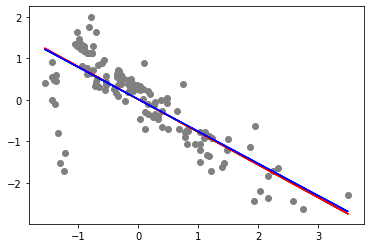

In [259]:
plt.scatter(X_train,Y_train,color='grey')
plt.plot(X_train,ypred_train_lr,color='red')
plt.plot(X_train,ypred_train_sgd,color='blue')
plt.show()

In [ ]:
#inference : as the RMSE values evaluated on train data for both models overalp, no much variation observed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
X = pd.DataFrame(ss.fit_transform(df[['Hepatitis B','Polio','Diphtheria ']]))
y = pd.DataFrame(ss.fit_transform(df[['Life_Expectancy']]))
sgd = SGDRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)
model_sgd_imm = sgd.fit(X_train,y_train)

In [66]:
model_sgd_imm.coef_

array([0.05205314, 0.33936463, 0.23609454])

In [67]:
lr = LinearRegression()
model_lr_imm = lr.fit(X_train,y_train)
model_lr_imm.coef_

array([[-0.15646397,  0.34199552,  0.444519  ]])

In [68]:
def plot_coefficients(model, algorithm_name):
    
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_.flatten()})

    
    #sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    
    sns.barplot(x = "Coefficient", y = "Variable", data = df_coeff)
    
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

 
    plt.ylabel('Features', fontsize = 15)


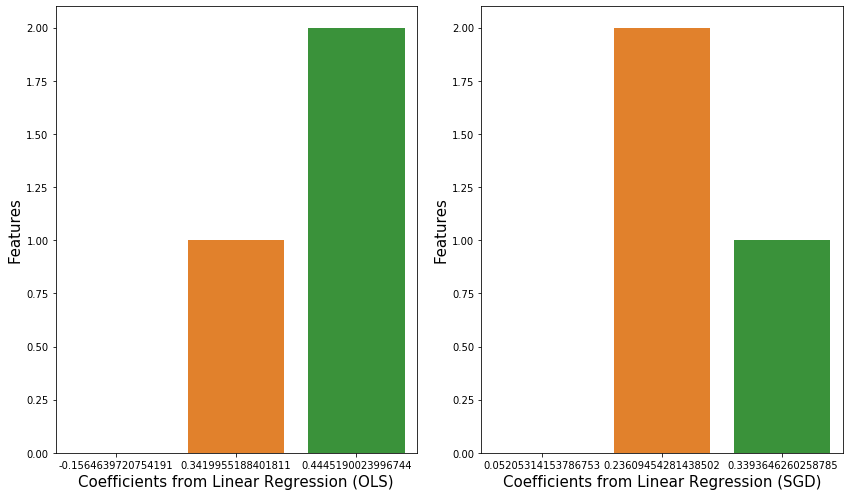

In [69]:
plt.rcParams['figure.figsize']=(12,7)
plt.subplot(1,2,1)
plot_coefficients(model_lr_imm, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(model_sgd_imm, 'Linear Regression (SGD)')

plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [282]:
X = df.drop(['Country','Life_Expectancy'],axis=1)
y = df.Life_Expectancy
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [285]:
model = lr.fit(X_train,Y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
mse_train = mean_squared_error(ypred_train,Y_train)
mse_test = mean_squared_error(ypred_test,Y_test)
print('the rmse of train data is',np.sqrt(mse_train))
print('the rmse of test data is ',np.sqrt(mse_test))

the rmse of train data is 2.59427940323826
the rmse of test data is  3.5099391801628594


In [ ]:
#inference : rmse of train data and test data varies

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# yes we can use it, no questions asked

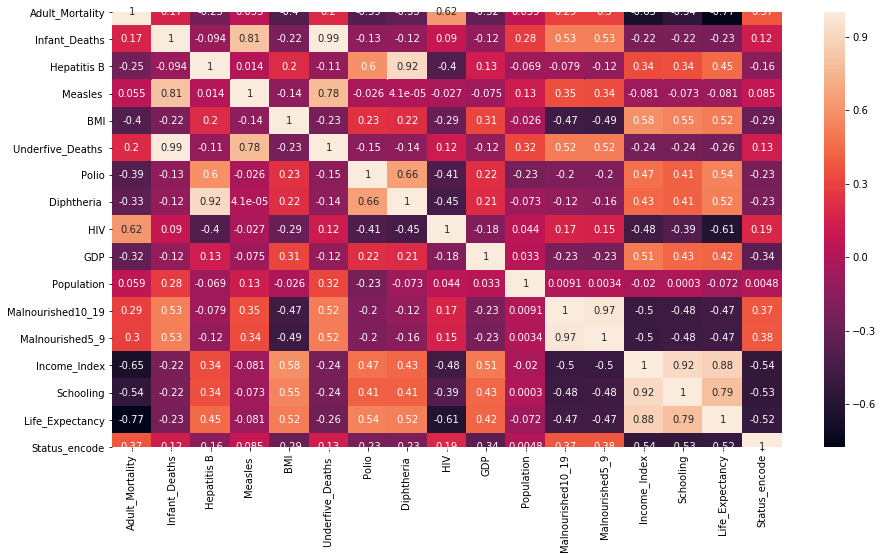

In [290]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [291]:
X = df.drop(['Country','Life_Expectancy'],axis=1)
y = df.Life_Expectancy
lr = LinearRegression()
model = lr.fit(X,y)
model.coef_


array([-2.39412817e-02,  1.01729036e-01,  4.47273900e-02, -9.21542657e-05,
       -1.37954749e-02, -7.28861192e-02,  1.55127905e-02, -6.87737011e-03,
       -4.92531150e-01, -6.26735057e-06,  1.51774097e-09, -1.29671274e-01,
       -8.58470021e-02,  2.79172123e+01, -3.52200119e-03, -1.16654360e+00])

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [175]:
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [292]:
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [293]:
ridge = Ridge()
model_ridge = ridge.fit(X_train,Y_train)
ypred_ridge_train = model_ridge.predict(X_train)
ypred_ridge_test = model_ridge.predict(X_test)
mse_train = mean_squared_error(ypred_ridge_train,Y_train)
mse_test = mean_squared_error(ypred_ridge_test,Y_test)
print('The RMSE of train data is ',np.sqrt(mse_train))
print('The RMSE of train data is ',np.sqrt(mse_test))

The RMSE of train data is  0.3285787990248701
The RMSE of train data is  0.41742148995493356


In [295]:
lr = LinearRegression()
model_LR = lr.fit(X_train,Y_train)
model_LR.coef_

array([[-0.25249764,  0.99375661,  0.14733308, -0.01483734, -0.07275573,
        -1.00503567,  0.03333613, -0.05366019, -0.1045272 , -0.02245211,
         0.08262974, -0.00114351, -0.08501351,  0.61340819, -0.03468069,
        -0.05660037]])

In [294]:
model_ridge.coef_

array([[-0.26104823,  0.25651391,  0.13402005,  0.03458537, -0.05824863,
        -0.29890883,  0.03629942, -0.03947183, -0.11147045, -0.01885607,
         0.02453927, -0.00734591, -0.05515479,  0.58190739, -0.00512236,
        -0.05835033]])

In [ ]:
#inference: comparitively the coffiencents of ridge model decreased

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [296]:
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [297]:
ss = StandardScaler()
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV']])
y = ss.fit_transform(df[['Life_Expectancy']])
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2, random_state=10)

In [300]:
lasso = Lasso(alpha=1.5)
model_lasso = lasso.fit(X_train,y_train)
model_lasso.coef_

array([ 0., -0.,  0.,  0., -0.])

In [304]:
model_ols = sm.OLS(y,X).fit().summary()
print(model_ols)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.494
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              32.74
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                    3.18e-23
Time:                        02:51:23   Log-Likelihood:                         -186.63
No. Observations:                 173   AIC:                                      383.3
Df Residuals:                     168   BIC:                                      399.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#polio and HIV are significant features for predicting Life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [305]:
df.head()

,Country,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_encode
0,Afghanistan,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000,1
1,Albania,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000,1
2,Algeria,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000,1
3,Angola,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000,1
4,Antigua,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000,1


In [312]:
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV','Malnourished10_19','Malnourished5_9']])
y = ss.fit_transform(df[['Life_Expectancy']])
X = sm.add_constant(X)
model1_ols = sm.OLS(y,X).fit().summary()
print(model1_ols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     35.08
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.20e-29
Time:                        02:58:21   Log-Likelihood:                -166.62
No. Observations:                 173   AIC:                             349.2
Df Residuals:                     165   BIC:                             374.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.227e-16      0.049   6.54e-15      1.0

In [ ]:
#'Hepatitis B','Measles ',Diphtheria ','HIV','Malnourished5_9' are insignificant varaibles for predicting Life expectancy

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [313]:
X = df.iloc[:,1:17]
y = df['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

enet= ElasticNet(alpha= 0.1, l1_ratio=.001)
e= enet.fit(X_train,y_train)

pred_train= e.predict(X_train)

mse3= mean_squared_error(y_train, pred_train)
rmse3= round(np.sqrt(mse3),4)
print('rmse of train data' ,rmse3)

pred_test= e.predict(X_test)
mse4= mean_squared_error(y_test, pred_test)
rmse4= round(np.sqrt(mse4),4)
print('rmse of test data ',rmse4)

rmse of train data 0.1395
rmse of test data  0.1632


In [ ]:
#inference : we can observed RMSE of train and test data is almost matching

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [316]:
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
X = sm.add_constant(X)
model1_ols1 = sm.OLS(y,X).fit().summary()
print(model1_ols1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     75.97
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           4.93e-65
Time:                        03:09:08   Log-Likelihood:                -57.440
No. Observations:                 173   AIC:                             148.9
Df Residuals:                     156   BIC:                             202.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.227e-16      0.027   1.19e-14      1.0

In [323]:
#x1,x2,x6,x14 are the significant values

<a id="gs"> </a>## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
ss = StandardScaler()
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [37]:
ridge = Ridge()
tune = [{'alpha':[7,8,9,10,11]}]
grid = GridSearchCV(estimator=ridge,
                   param_grid=tune)
model_ridge = grid.fit(X_train,Y_train)
print('Best Parameters',model_ridge.best_params_)

Best Parameters {'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
ss = StandardScaler()
X = ss.fit_transform(df.drop(['Country','Life_Expectancy'],axis=1))
y = ss.fit_transform(df[['Life_Expectancy']])
lr = LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [40]:
tune = [{'alpha':[7,8,9,10,11]}]
lasso  = Lasso()

l_grid = GridSearchCV(estimator=lasso,
            param_grid=tune,
            cv=5)
l_grid.fit(X_train,Y_train)
l_grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 7}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
X = ss.fit_transform(df[['Hepatitis B','Measles ','Polio','Diphtheria ','HIV','Malnourished10_19','Malnourished5_9']])
y = ss.fit_transform(df[['Life_Expectancy']])
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [45]:
elastic = ElasticNet()
tune=[{'alpha':  [0.1,0.5,1,1.5,2,2.5,3,3.5,4],
     'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

e_grid=GridSearchCV(estimator=elastic,
            param_grid=tune,
            cv=5)
e_grid.fit(X_train,Y_train)
print('Best Parameters are',e_grid.best_params_)

Best Parameters are {'alpha': 0.1, 'l1_ratio': 0.5}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [47]:
model = ElasticNet(alpha=0.1,l1_ratio=0.5)
model_best = model.fit(X_train,Y_train)
ypred_best  = model_best.predict(X_test)
mse_best = mean_squared_error(ypred_best,Y_test)
print('the RMSE of elastic model with best parameters is',np.sqrt(mse_best))

the RMSE of elastic model with best parameters is 0.6585582208150679


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
tune=[{'l1_ratio': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

e=ElasticNet(alpha=0.8)

e_grid=GridSearchCV(estimator=e,
            param_grid=tune,
            cv=5)
e_grid.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
e_grid.best_params_

{'l1_ratio': 0.5}

In [52]:
model = ElasticNet(alpha=0.8,l1_ratio=0.5)
model_best = model.fit(X_train,Y_train)
ypred_best  = model_best.predict(X_test)
mse_best = mean_squared_error(ypred_best,Y_test)
print('the RMSE of elastic model with best parameters is',np.sqrt(mse_best))

the RMSE of elastic model with best parameters is 0.8876580574384115
